# Tree Ring Signal On Spotgrid Measurements

Author: Johnny Esteves, University Of Michigan

## Description: 
Here we compute the tree ring signal from the spotgrid measurements. In particular, we look at astrometric shift, psf-size, shear and flux of the spots.

In [29]:
cd ..

/Users/jesteves/Documents/GitHub


In [30]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rc('image', interpolation='bicubic', origin='lower', cmap = 'viridis')
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['figure.figsize'] = [14.0, 10.0]
plt.rcParams['font.size'] = 16
rcParams = plt.rcParams.copy()

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import glob
import numpy as np
# import fitsio as fits
import matplotlib.pyplot as plt


# Load Data

Retrieving files path from BUTLER.

This files are output measurements from the spotgrid detector code, ```mixcoatl```.

## Initialize the `spotgrid.py` code

In [13]:
cd ../

/Users/jesteves/Documents/GitHub/lsst-treeRing


In [15]:
from spotgrid_butler_new import SpotgridCatalog

repo25 = '/sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml'
repo9 = '/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml'

setting = [
    (repo25, 'u/snyder18/spot_13242/gridfit_run1', 'u/snyder18/spot_13242/gridcalibration'),
    (repo25, 'u/snyder18/spot_13243/gridfit_run1', 'u/snyder18/spot_13243/gridcalibration'),
    (repo25, 'u/snyder18/spot_13237/gridfit_run1', 'u/snyder18/spot_13237/gridcalibration'),
    (repo25, 'u/snyder18/spot_13246/gridfit_run1', 'u/snyder18/spot_13246/gridcalibration'),
    (repo9, 'u/asnyder/spot/e2v_analysis', 'u/asnyder/spot/e2v_calibration'),        
    (repo9, 'u/asnyder/spot/itl_analysis', 'u/asnyder/spot/itl_calibration')]


In [16]:
# load spotgrid data
# sensors
sensors = []
for mysetting in setting:
    sensor = SpotgridCatalog(*mysetting)

    #asensor.get_calibration_table()
    sensor.load_data()
    sensor.correct_shaking()
    sensor.compute_statistics()
    sensor.filter_spots(value=.4)   # value=.4
    sensor.compute_spotgrid()
    sensor.calibrate()
    
    # new functions
    sensor.compute_ellipticities()
    sensor.get_imaging_map()    
    sensor.transform_to_treeRing_coords()
    
    sensors.append(sensor)
    print('\n')


repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
catalog collection: u/snyder18/spot_13242/gridfit_run1
calib collection  : u/snyder18/spot_13242/gridcalibration


Found tmp/R03_S12_x_arr.npy
Found tmp/R03_S12_y_arr.npy
Found tmp/R03_S12_xx_arr.npy
Found tmp/R03_S12_xy_arr.npy
Found tmp/R03_S12_yy_arr.npy
Found tmp/R03_S12_dx_arr.npy
Found tmp/R03_S12_dy_arr.npy
Found tmp/R03_S12_dxx_arr.npy
Found tmp/R03_S12_dyy_arr.npy
Found tmp/R03_S12_dxy_arr.npy
Found tmp/R03_S12_instFlux_arr.npy
Found tmp/R03_S12_instFluxErr_arr.npy
Found tmp/R03_S12_x_center_arr.npy
Found tmp/R03_S12_y_center_arr.npy
Found tmp/R03_S12_dFlux_arr.npy
Found tmp/R03_S12_dg1_arr.npy
Found tmp/R03_S12_dg2_arr.npy
Loading data for ITL tmp/R03_S12.
Computing statistics for ITL tmp/R03_S12.
Computing filter spots for ITL tmp/R03_S12.


repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
Repository        : /sdf/

# Tree Ring Analysis

In [18]:
import tree_ring_helper as tr

keys = {
        'astrometric-shift':['r','Astrometric Shift [pixels]',1.],
        'flux-ratio':['abs','Flux-Ratio', 100.],
        'psf-size':['abs','PSF-Size: $I_{xx}+I_{yy}$',100.],
        'ellipticity':['r','Shear: $\\sqrt{e_1^2+e_2^2}$',100.]
       }

In [25]:
## Generate Tree Ring Profiles
# treeRings = {}
for variable in keys.keys():
    print('Variable: %s'%variable)
    component = keys[variable][0]
    ylabel = keys[variable][1]
    strech = keys[variable][2]
    rings = []
    for sensor in sensors[1:]:
        print('Sensor Bay: %s'%(sensor.sensorbay))
        ring = tr.tree_ring_tools(sensor)
        ring.make_image(variable, component, fradius=None)
        ring.apply_strech(strech)
        ring.apply_high_freq_filter()
        ring.apply_gaussian_filter(downscale=4)
        ring.apply_mask()
        ring.make_polar_transformation(theta_cut=[100, 550])
        ring.compute_signal()
        ring.make_profile(ring.diff,step=1)
        ring.save_profile(variable)
        rings.append(ring)
    treeRings[variable] = rings
    print('\n')


Variable: astrometric-shift
Sensor Bay: R10_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/astrometric-shift_ITL_R10_S11.npy
Sensor Bay: R24_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/astrometric-shift_E2V_R24_S11.npy
Sensor Bay: R32_S01
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


saving: profiles/astrometric-shift_E2V_R32_S01.npy
Sensor Bay: R22_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/astrometric-shift_E2V_R22_S11.npy
Sensor Bay: R02_S02
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/astrometric-shift_ITL_R02_S02.npy


Variable: flux-ratio
Sensor Bay: R10_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:366: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:371: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())
/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/flux-ratio_ITL_R10_S11.npy
Sensor Bay: R24_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/flux-ratio_E2V_R24_S11.npy
Sensor Bay: R32_S01
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/flux-ratio_E2V_R32_S01.npy
Sensor Bay: R22_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/flux-ratio_E2V_R22_S11.npy
Sensor Bay: R02_S02
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/flux-ratio_ITL_R02_S02.npy


Variable: psf-size
Sensor Bay: R10_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/psf-size_ITL_R10_S11.npy
Sensor Bay: R24_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/psf-size_E2V_R24_S11.npy
Sensor Bay: R32_S01
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/psf-size_E2V_R32_S01.npy
Sensor Bay: R22_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/psf-size_E2V_R22_S11.npy
Sensor Bay: R02_S02
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/psf-size_ITL_R02_S02.npy


Variable: ellipticity
Sensor Bay: R10_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/ellipticity_ITL_R10_S11.npy
Sensor Bay: R24_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/ellipticity_E2V_R24_S11.npy
Sensor Bay: R32_S01
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


saving: profiles/ellipticity_E2V_R32_S01.npy
Sensor Bay: R22_S11
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/ellipticity_E2V_R22_S11.npy
Sensor Bay: R02_S02
Welcome to Tree Ring Tools


/usr/local/anaconda/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


saving: profiles/ellipticity_ITL_R02_S02.npy




In [26]:
variable = 'astrometric-shift'
rings    = treeRings[variable]

Plot R10_S11

Plot R24_S11

Plot R32_S01

Plot R22_S11

Plot R02_S02



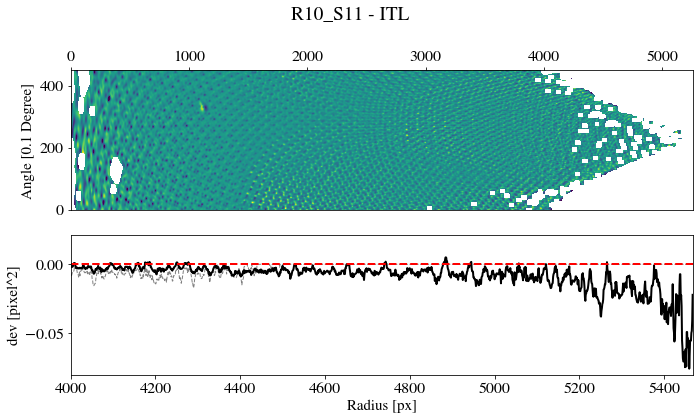

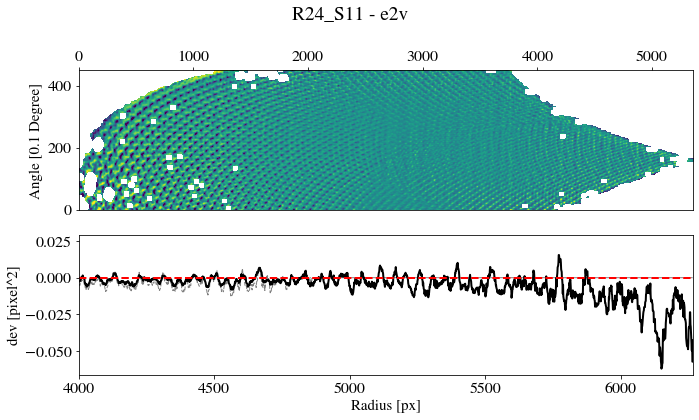

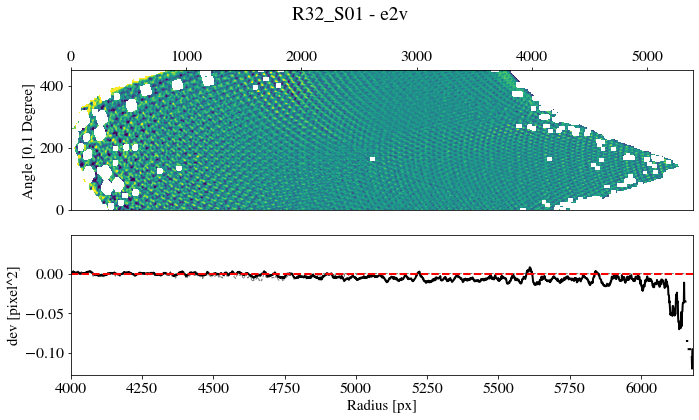

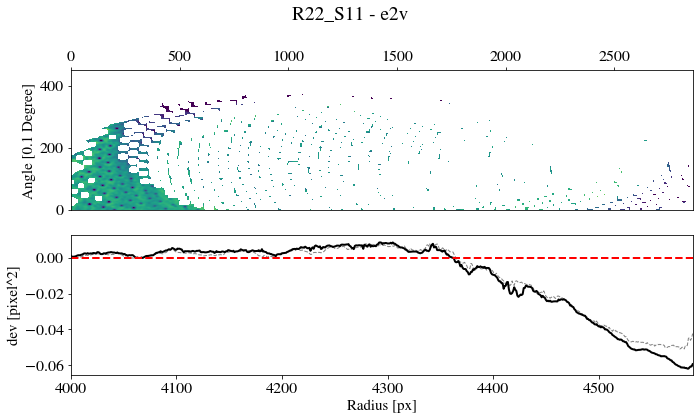

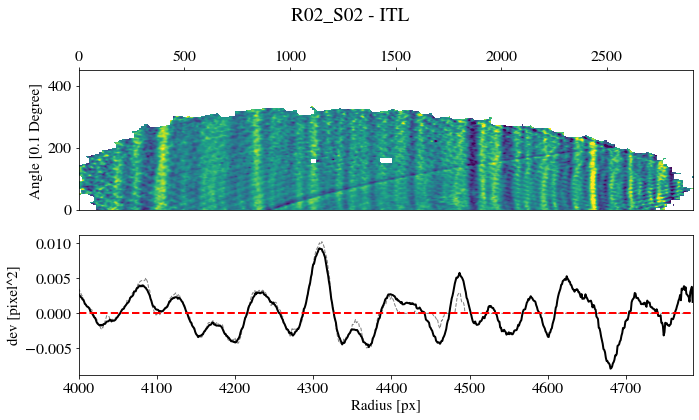

In [27]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('./figures/fig_distortionMap_%s_treeRingSignal_collection.pdf'%variable) as pdf:
    for ring in rings:
        print('Plot %s'%ring.sensorbay)
        ring.title = '%s - %s'%(ring.sensorbay, ring.sensor)
        ring.ylabel = 'dev [pixel^2]'
        #ring.display_images()
        ring.plot_pannel_image_signal()
        plt.xlim(4000,)
        pdf.savefig()
        print('')

Plot R10_S11
Plot R24_S11
Plot R32_S01
Plot R22_S11
Plot R02_S02


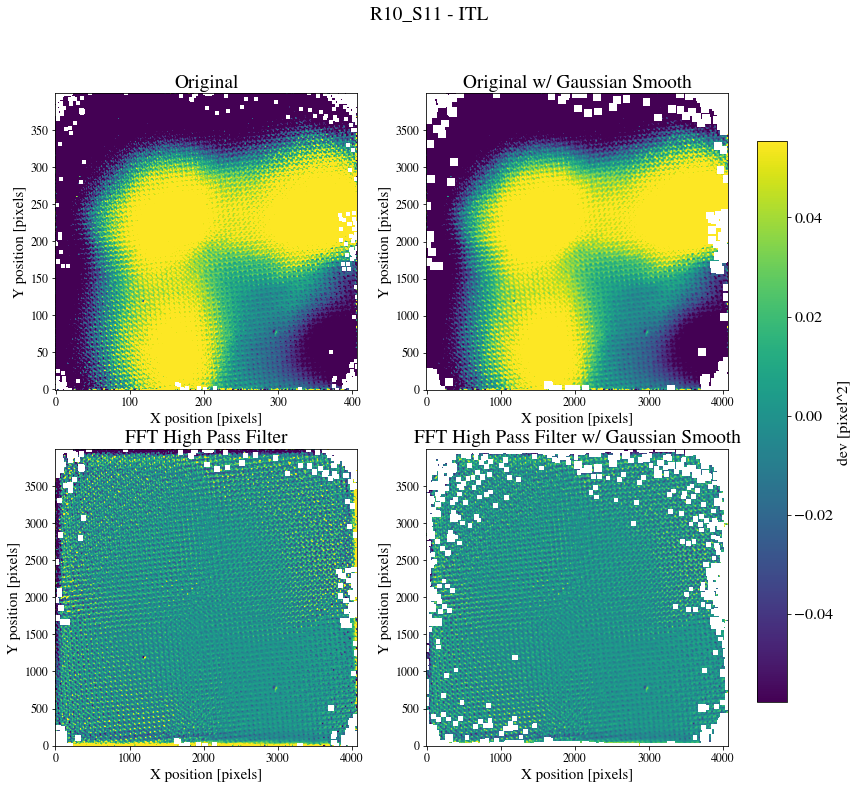

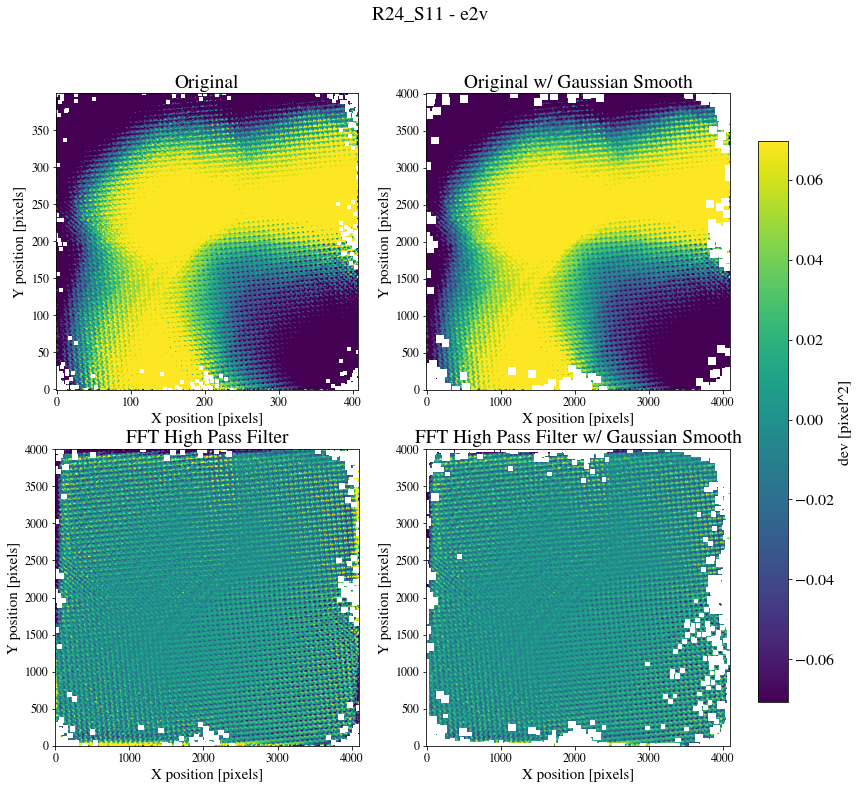

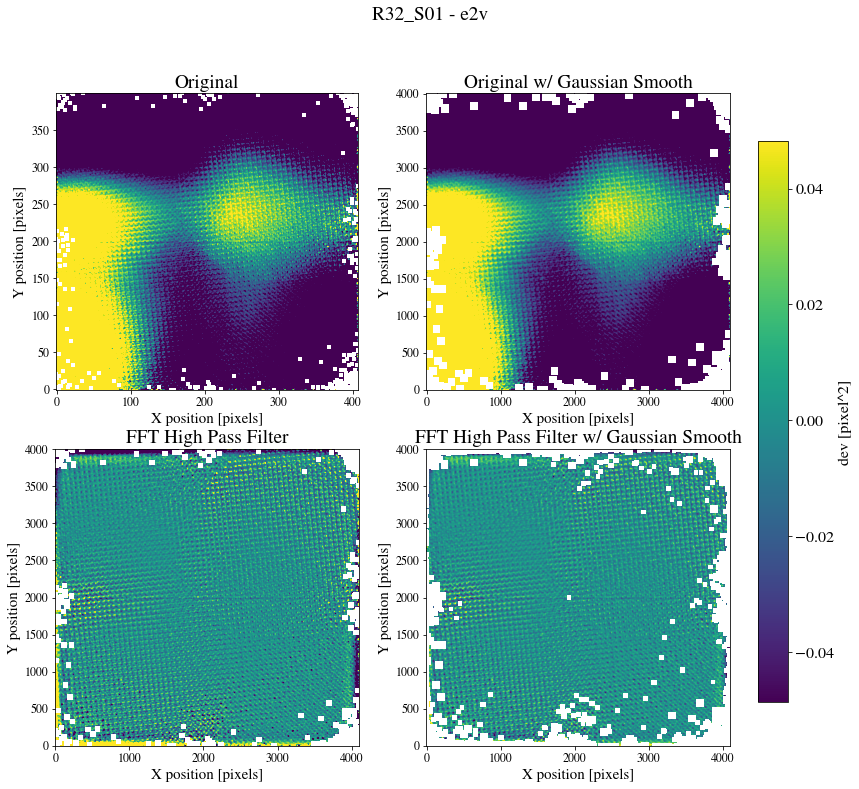

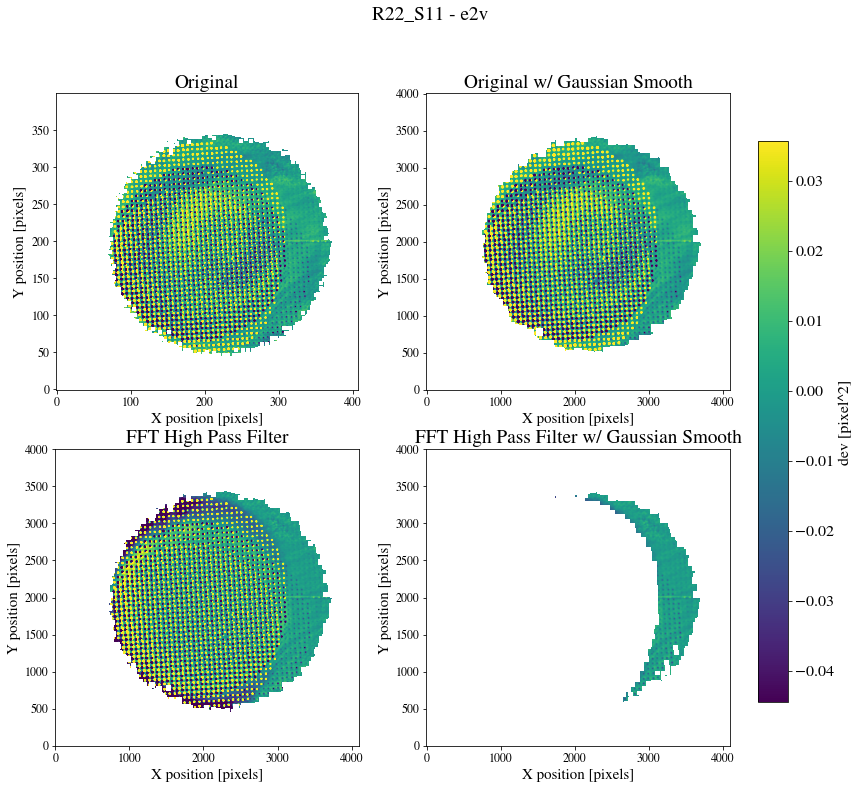

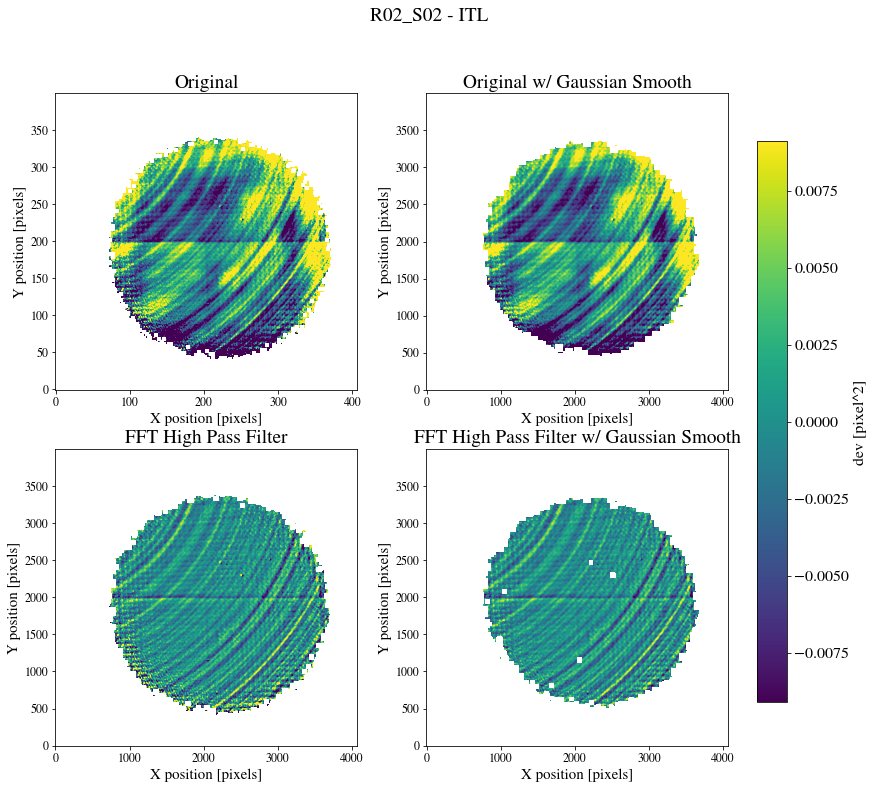

In [28]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('./figures/fig_distortionMap_%s_treeRingSignal_collection.pdf'%variable) as pdf:
    for ring in rings:
        print('Plot %s'%ring.sensorbay)
        ring.title = '%s - %s'%(ring.sensorbay, ring.sensor)
        ring.ylabel = 'dev [pixel^2]'
        ring.display_images()
        pdf.savefig()


## Polar Transformation

In [8]:
from tree_ring_helper import *

In [9]:
#help(tree_ring_tools)

In [10]:
#centers = [[4320,-280],[-156,-280],[4320,4180],[-156,4180]]
#centers = [[-310, 4086.36],[-156,-280],[4320,4180],[4439.24, -434.62]]
centers = [[-335.49, 4095.84],[-156,-280],[4320,4180],[4627.47, -630.89]]

sensor_lims = {'e2v':[[0,4096],[0,4004]],'ITL':[[0,4072],[0,4000]]}

In [11]:
def proj_to_polar_coord(t,vx,vy):
    vr = np.cos(t)*vx + np.sin(t)*vy
    vt = -np.sin(t)*vx+ np.cos(t)*vy
    return vr, vt

def proj_to_polar_coord_spin2(t,vx,vy):
    vr = np.cos(2*t)*vx + np.sin(2*t)*vy
    vt = np.sin(2*t)*vx - np.cos(2*t)*vy
    return vr, vt

def trasnform_to_polar_coord(x,y,x0=0.,y0=0.,deg=False):
    r = np.hypot((x-x0),(y-y0))
    t = np.arctan2((y-y0),(x-x0))
    
    if deg: t *= (180 / np.pi)
    return r,t

In [12]:
xc,yc = centers[3]

r, t = trasnform_to_polar_coord(e2v.xfltr_flat,e2v.yfltr_flat, x0=xc, y0=yc)

dr,dt= proj_to_polar_coord(t,e2v.dX,e2v.dY)
dgr,dgt= proj_to_polar_coord_spin2(t,e2v.dg1,e2v.dg2)

e2v.dR = dr
e2v.dt = dt

e2v.dgr= dgr
e2v.dgt= dgt

In [13]:
xc,yc = centers[0]
r, t = trasnform_to_polar_coord(itl.xfltr_flat,itl.yfltr_flat, x0=xc, y0=yc)

dr,dt= proj_to_polar_coord(t,itl.dX,itl.dY)
dgr,dgt= proj_to_polar_coord_spin2(t,itl.dg1,itl.dg2)

itl.dR = dr
itl.dt = dt

itl.dgr= dgr
itl.dgt= dgt

In [14]:
sensor_lims = {'e2v':[[0,4096],[0,4004]],'ITL':[[0,4072],[0,4000]]}

def generate_image(self,var,MAX=0.07,fradius=140,sensor='e2v'):
    
    nanmask = np.isfinite(self.deltaXX) #masks all the NaN entries created when a catalog didn't have 2401 entries
    xxfltr_flat = self.xxfltr[nanmask].flatten()
    yyfltr_flat = self.yyfltr[nanmask].flatten()

    dmap = {'dT':self.dT/(xxfltr_flat+yyfltr_flat),'dXX':self.dXX/(xxfltr_flat),'dYY':self.dYY/(yyfltr_flat),'dXY':self.dXY,
            'dX':self.dX,'dY':self.dY,'dg1':self.dg1,'dg2':self.dg2,'dF':self.deltaF,
            'dr':self.dR,'dtheta':self.dt,'dgr':self.dgr,'dgt':self.dgt}
    
    nbins = 400
    bins = [407,400] #approx. 10x10 px^2 binning
    dT_mean, x_edge, y_edge, binidx = binned_statistic_2d(self.xfltr_flat, self.yfltr_flat, dmap[var], 'mean',
                                                          range=sensor_lims[sensor], bins=bins)
                                                          #mean is significantly faster calculation
    
    ## cut borders
    mask    = mask_borders(self,x_edge,y_edge,dT_mean,MAX=MAX,fradius=fradius)
    
    ## sensor max limits
    xmax = sensor_lims[self.sensor][0][1]
    ymax = sensor_lims[self.sensor][1][1]
    
    ## resize image
    resized     = cv2.resize(dT_mean.T,(xmax,ymax), interpolation = cv2.INTER_AREA)
    resized_cut = cv2.resize(mask.T   ,(xmax,ymax), interpolation = cv2.INTER_AREA)
    
    return dT_mean,resized,resized_cut

## Visualize the dataset

In [15]:
## choose the sensor

self = e2v

title  = 'ITL: R02 S02'
ylabel = 'dev. from the mean [pixel]'

In [16]:
#e2v=0
#itl=0

# Figure 1 - Astrometric Shift, Second Moments and Ellipticity Maps

In [17]:
self = itl
_,_,idr_img =  generate_image(self,'dr' ,fradius=150)
_,_,idt_img =  generate_image(self,'dT' ,fradius=150)
_,_,idg_img =  generate_image(self,'dgr',fradius=150)

idr_img1 = apply_filter(idr_img, 250, power=4)
idt_img1 = apply_filter(idt_img, 250, power=4)
idg_img1 = apply_filter(idg_img, 250, power=4)

# _,_,idxx_img =  generate_image(self,'dXX' ,fradius=150)
# _,_,idyy_img =  generate_image(self,'dYY' ,fradius=150)

# _,_,idx_img =  generate_image(self,'dX' ,fradius=150)
# _,_,idy_img =  generate_image(self,'dY' ,fradius=150)

# _,_,idg1_img =  generate_image(self,'dg1' ,fradius=150)
# _,_,idg2_img =  generate_image(self,'dg2' ,fradius=150)

# idxx_img1 = apply_filter(idxx_img, 250, power=4)
# idyy_img1 = apply_filter(idyy_img, 250, power=4)

# idx_img1  = apply_filter(idx_img, 250, power=4)
# idy_img1  = apply_filter(idy_img, 250, power=4)

# idg1_img1 = apply_filter(idg1_img, 250, power=4)
# idg2_img1 = apply_filter(idg2_img, 250, power=4)

In [18]:
self = e2v
_,_,edr_img =  generate_image(self,'dr' ,fradius=150)
_,_,edt_img =  generate_image(self,'dT' ,fradius=150)
_,_,edg_img =  generate_image(self,'dgr',fradius=150)

edr_img1 = apply_filter(edr_img, 250, power=4)
edt_img1 = apply_filter(edt_img, 250, power=4)
edg_img1 = apply_filter(edg_img, 250, power=4)

# _,_,edxx_img =  generate_image(self,'dXX' ,fradius=150)
# _,_,edyy_img =  generate_image(self,'dYY' ,fradius=150)

# _,_,edx_img =  generate_image(self,'dX' ,fradius=150)
# _,_,edy_img =  generate_image(self,'dY' ,fradius=150)

# _,_,edg1_img =  generate_image(self,'dg1' ,fradius=150)
# _,_,edg2_img =  generate_image(self,'dg2' ,fradius=150)

# edxx_img1 = apply_filter(edxx_img, 250, power=4)
# edyy_img1 = apply_filter(edyy_img, 250, power=4)

# edx_img1  = apply_filter(edx_img, 250, power=4)
# edy_img1  = apply_filter(edy_img, 250, power=4)

# edg1_img1 = apply_filter(edg1_img, 250, power=4)
# edg2_img1 = apply_filter(edg2_img, 250, power=4)

In [145]:
def imshow(image,axes,title='',show_colorbar=False,levels=[-0.015,0.015]):
    im0 = axes.imshow(image,origin='lower',vmin=levels[0],vmax=levels[1], cmap='viridis')
    axes.set_xlabel('X position [pixels]', fontsize=20)
    axes.set_ylabel('Y position [pixels]', fontsize=20)
    axes.tick_params(axis='x', labelsize=12)
    axes.tick_params(axis='y', labelsize=12)
    axes.set_aspect('equal')
    axes.set_title(title)
    if show_colorbar: return im0

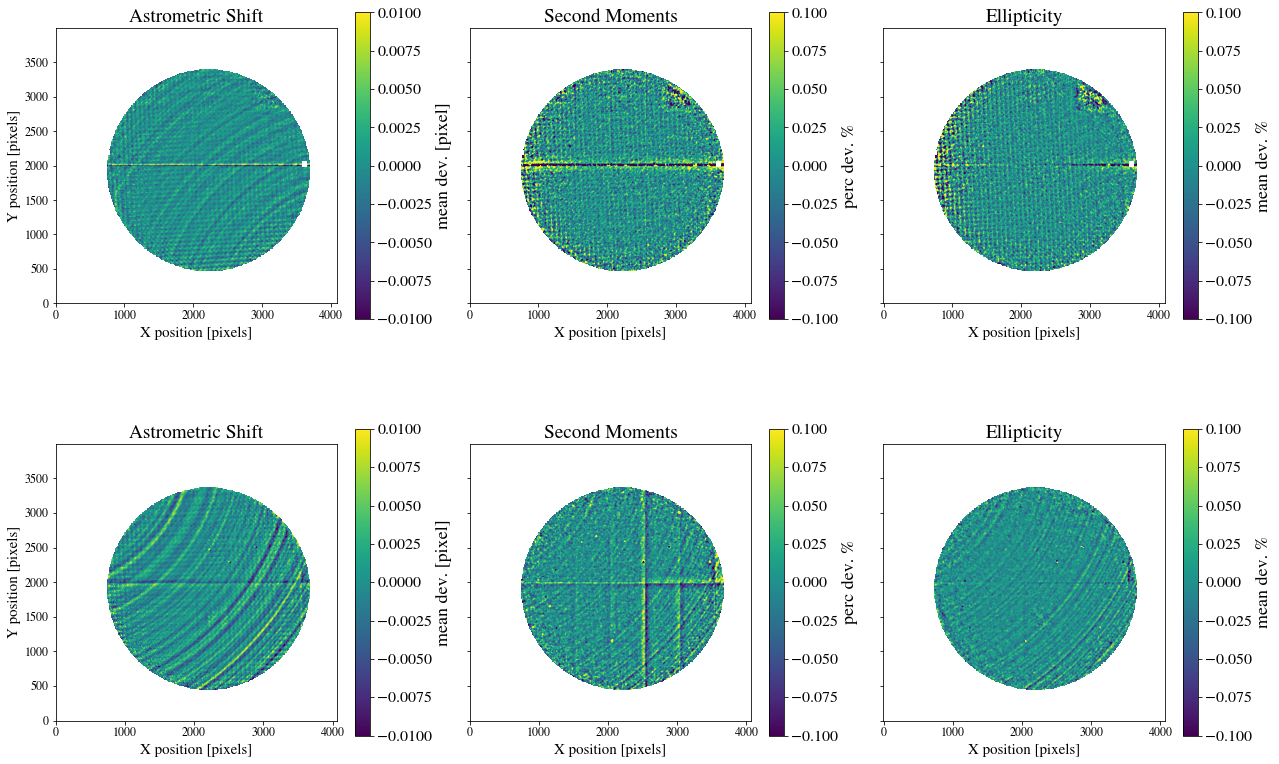

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharey='all')

axes = axs[0]
levels = np.array([-0.01,0.01])
im1 = imshow(edr_img1      ,axes[0],title='Astrometric Shift',levels=levels*1., show_colorbar=True)
im2 = imshow(100.*edt_img1 ,axes[1],title='Second Moments'   ,levels=levels*10., show_colorbar=True)
im3 = imshow(100.*edg_img1   ,axes[2],title='Ellipticity'    ,levels=levels*10., show_colorbar=True)

fig.colorbar(im1,ax=axes[0] ,shrink=0.75).set_label(r'mean dev. [pixel]', fontsize=18)
fig.colorbar(im2,ax=axes[1] ,shrink=0.75).set_label(r'perc dev. %', fontsize=18)
fig.colorbar(im3,ax=axes[2] ,shrink=0.75).set_label(r'mean dev. %', fontsize=18)

for i in range(1,3):
    axes[i].set_ylabel('')
fig.subplots_adjust(wspace=0.20)

axes = axs[1]
levels = np.array([-0.01,0.01])
im1 = imshow(idr_img1      ,axes[0],title='Astrometric Shift',levels=levels*1., show_colorbar=True)
im2 = imshow(100.*idt_img1 ,axes[1],title='Second Moments'   ,levels=levels*10., show_colorbar=True)
im3 = imshow(100.*idg_img1 ,axes[2],title='Ellipticity'      ,levels=levels*10., show_colorbar=True)

fig.colorbar(im1,ax=axes[0] ,shrink=0.75).set_label(r'mean dev. [pixel]', fontsize=18)
fig.colorbar(im2,ax=axes[1] ,shrink=0.75).set_label(r'perc dev. %', fontsize=18)
fig.colorbar(im3,ax=axes[2] ,shrink=0.75).set_label(r'mean dev. %', fontsize=18)

for i in range(1,3):
    axes[i].set_ylabel('')

fig.tight_layout()
fig.savefig('figures/fig_1_map_astroShift_secMoments_ellipticity.pdf', dpi=240, format='pdf', bbox_inches='tight')
# plt.suptitle(title)

#plt.clf()

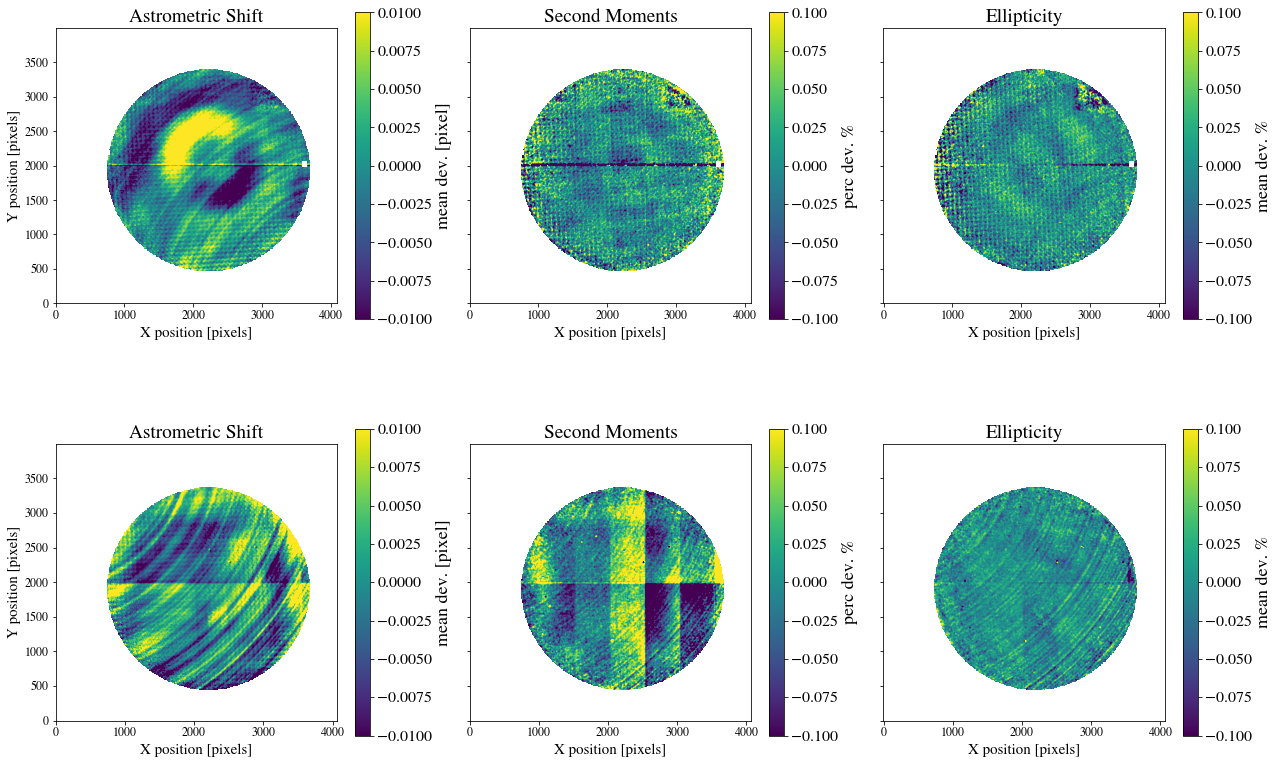

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharey='all')

axes = axs[0]
levels = np.array([-0.01,0.01])
im1 = imshow(edr_img      ,axes[0],title='Astrometric Shift',levels=levels*1., show_colorbar=True)
im2 = imshow(100.*edt_img ,axes[1],title='Second Moments'   ,levels=levels*10., show_colorbar=True)
im3 = imshow(100.*edg_img   ,axes[2],title='Ellipticity'    ,levels=levels*10., show_colorbar=True)

fig.colorbar(im1,ax=axes[0] ,shrink=0.75).set_label(r'mean dev. [pixel]', fontsize=18)
fig.colorbar(im2,ax=axes[1] ,shrink=0.75).set_label(r'perc dev. %', fontsize=18)
fig.colorbar(im3,ax=axes[2] ,shrink=0.75).set_label(r'mean dev. %', fontsize=18)

for i in range(1,3):
    axes[i].set_ylabel('')
fig.subplots_adjust(wspace=0.20)

axes = axs[1]
levels = np.array([-0.01,0.01])
im1 = imshow(idr_img      ,axes[0],title='Astrometric Shift',levels=levels*1., show_colorbar=True)
im2 = imshow(100.*idt_img ,axes[1],title='Second Moments'   ,levels=levels*10., show_colorbar=True)
im3 = imshow(100.*idg_img ,axes[2],title='Ellipticity'      ,levels=levels*10., show_colorbar=True)

fig.colorbar(im1,ax=axes[0] ,shrink=0.75).set_label(r'mean dev. [pixel]', fontsize=18)
fig.colorbar(im2,ax=axes[1] ,shrink=0.75).set_label(r'perc dev. %', fontsize=18)
fig.colorbar(im3,ax=axes[2] ,shrink=0.75).set_label(r'mean dev. %', fontsize=18)

for i in range(1,3):
    axes[i].set_ylabel('')

fig.tight_layout()
fig.savefig('figures/fig_1_map_astroShift_secMoments_ellipticity.pdf', dpi=240, format='pdf', bbox_inches='tight')
# plt.suptitle(title)

#plt.clf()

In [20]:
edr_img1 = edt_img1 = edg_img1 = 0
edr_img = edt_img = edg_img = 0

# Figure 2 - Signal Profiles

In [21]:
self = itl

_,_,idxx_img =  generate_image(self,'dXX' ,fradius=150)
_,_,idyy_img =  generate_image(self,'dYY' ,fradius=150)

_,_,idx_img =  generate_image(self,'dX' ,fradius=150)
_,_,idy_img =  generate_image(self,'dY' ,fradius=150)

_,_,idg1_img =  generate_image(self,'dg1' ,fradius=150)
_,_,idg2_img =  generate_image(self,'dg2' ,fradius=150)

idxx_img1 = apply_filter(idxx_img, 250, power=4)
idyy_img1 = apply_filter(idyy_img, 250, power=4)

idx_img1  = apply_filter(idx_img, 250, power=4)
idy_img1  = apply_filter(idy_img, 250, power=4)

idg1_img1 = apply_filter(idg1_img, 250, power=4)
idg2_img1 = apply_filter(idg2_img, 250, power=4)

In [22]:
self = e2v

_,_,edxx_img =  generate_image(self,'dXX' ,fradius=150)
_,_,edyy_img =  generate_image(self,'dYY' ,fradius=150)

_,_,edx_img =  generate_image(self,'dX' ,fradius=150)
_,_,edy_img =  generate_image(self,'dY' ,fradius=150)

_,_,edg1_img =  generate_image(self,'dg1' ,fradius=150)
_,_,edg2_img =  generate_image(self,'dg2' ,fradius=150)

edxx_img1 = apply_filter(edxx_img, 250, power=4)
edyy_img1 = apply_filter(edyy_img, 250, power=4)

edx_img1  = apply_filter(edx_img, 250, power=4)
edy_img1  = apply_filter(edy_img, 250, power=4)

edg1_img1 = apply_filter(edg1_img, 250, power=4)
edg2_img1 = apply_filter(edg2_img, 250, power=4)

In [23]:
image = edg1_img1

In [38]:
# Pixel coordinate grid
def get_direction(direction,image,x0=0.,y0=0.):
    y,x   = np.mgrid[0:image.shape[0] , 0:image.shape[1]]
    y,x   = np.mgrid[0:image.shape[0] , 0:image.shape[1]]

    if direction=='r':
        res = np.hypot(x-x0, y-y0)
    elif direction=='y':
        res = y
    else:
        res = x
    return res

def get_stats(x,y,nbins=10):
    n, _ = np.histogram(x, bins=nbins)
    sy, _ = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    
    n = np.where(n<1.,np.nan,n)
    
    bins = (_[1:] + _[:-1])/2
    mean = sy / n
    
    std = np.sqrt(sy2/n - mean*mean) / np.sqrt(n)
    return bins, mean, std

def make_profile(diff, direction='x', mask=None, nbins=11, x0=0., y0=0.):
    idx = np.isfinite(diff) & (diff != 0)
    if mask is not None:
        idx &= ~mask
    
    x    = get_direction(direction,diff,x0,y0)
    xvar = x[idx].flatten()
    cvar = diff[idx].flatten()
    xb,cm,ce = get_stats(xvar,cvar,nbins=nbins)
    return xb,cm,ce

def plot_profile(x,y,yerr,bins,ax=None):
    if ax is None: ax = plt.axes()
    xerr = np.diff(bins)/2.
    ax.errorbar(x,y,yerr=yerr,xerr=xerr)

## Signal Profiles

Characterize the singal characteristics on second moments, ellipticity and astrometric shift. 

In [11]:
lines = np.linspace(np.min(x),np.max(x),9)[2:-1]

NameError: name 'x' is not defined

In [40]:
lines

array([1023.75 , 1535.625, 2047.5  , 2559.375, 3071.25 , 3583.125])

In [41]:
rad_bins = np.linspace(0.,5000.,400)

In [42]:
def plot_signal_profile_across(images,labels,ax1=None,scale=1.,xlabel=True,mask=None):
    if ax1 is None: ax1 = plt.axes()
    
    for i,image in enumerate(images):
        out = make_profile(image, direction='x', mask=mask,x0=xc,y0=yc,nbins=rad_bins)
        std = scale*np.nanstd(out[1])
        ax1.errorbar(out[0], scale*out[1],yerr=scale*out[2],label=labels[i])
        
        if i==0: ax1.set_ylim(-4.*std,4.*std)

    for li in lines:
        ax1.axvline(li,color='grey',ls='--',lw=3,alpha=0.4)
    
    ax1.legend(fontsize=12,loc=2)

    if xlabel:
        ax1.set_xlabel('x [pixels]',fontsize=18)

In [52]:
sensor_label = ['E2V/R11 S22','ITL/R02 S02']

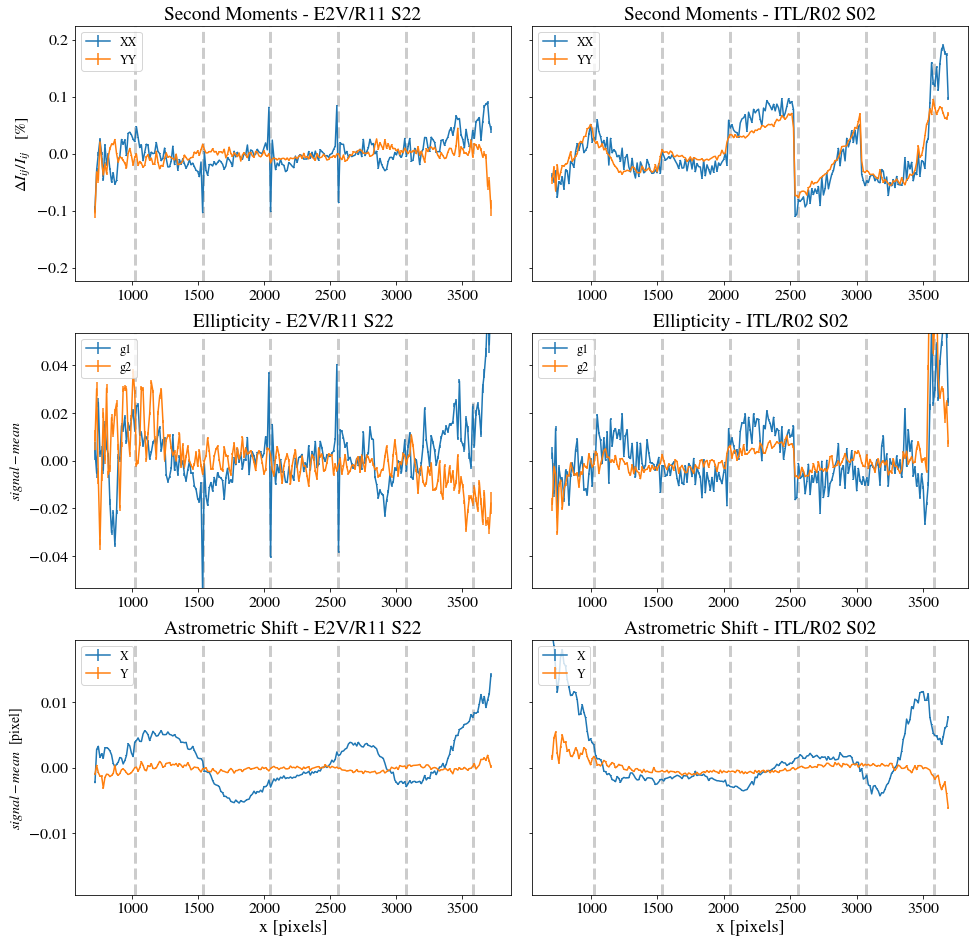

In [54]:
fig, axs = plt.subplots(3,2,figsize=(16,16), sharey='row')
fig.subplots_adjust(wspace=0.05)

## e2v
i=0 
labels = ['XX','YY']
images = [edxx_img,edyy_img]
plot_signal_profile_across(images,labels,ax1=axs[0,i],scale=100.,xlabel=False)
axs[0,i].set_ylabel(r'$\Delta I_{ij} / I_{ij}$   [%]')
axs[0,i].set_title('Second Moments - %s'%sensor_label[i])

labels = ['g1','g2']
images = [edg1_img,edg2_img]
plot_signal_profile_across(images,labels,ax1=axs[1,i],scale=100.,xlabel=False)
axs[1,i].set_ylabel(r'$signal-mean$', fontsize=14)
axs[1,i].set_title('Ellipticity - %s'%sensor_label[i])

labels = ['X','Y']
images = [edx_img,edy_img]
plot_signal_profile_across(images,labels,ax1=axs[2,i],scale=1.,xlabel=True)
axs[2,i].set_ylabel(r'$signal-mean$  [pixel]', fontsize=14)
axs[2,i].set_title('Astrometric Shift - %s'%sensor_label[i])

#itl 
i=1
labels = ['XX','YY']
images = [idxx_img,idyy_img]
plot_signal_profile_across(images,labels,ax1=axs[0,i],scale=100.,xlabel=False)
# axs[0,i].set_ylabel(r'$\Delta I_{ij} / I_{ij}$   [%]')
axs[0,i].set_title('Second Moments - %s'%sensor_label[i])

labels = ['g1','g2']
images = [idg1_img,idg2_img]
plot_signal_profile_across(images,labels,ax1=axs[1,i],scale=100.,xlabel=False)
# axs[1,i].set_ylabel(r'$signal-mean$', fontsize=14)
axs[1,i].set_title('Ellipticity - %s'%sensor_label[i])

labels = ['X','Y']
images = [idx_img,idy_img]
plot_signal_profile_across(images,labels,ax1=axs[2,i],scale=1.,xlabel=True)
# axs[2,i].set_ylabel(r'$signal-mean$  [pixel]', fontsize=14)
axs[2,i].set_title('Astrometric Shift - %s'%sensor_label[i])

fig.savefig('figures/fig_2_signal_profile_vs_x.pdf', dpi=240, format='pdf', bbox_inches='tight')

In [26]:
# lines = np.linspace(np.min(x),np.max(x),9)#[1:-1]

In [57]:
image1,image2 = edxx_img, edyy_img

peak: 1.36495
peak: 1.09127
peak: 0.85911
peak: 0.74340
peak: 0.81463
peak: 0.79095
peak: 0.99530
peak: 1.36067


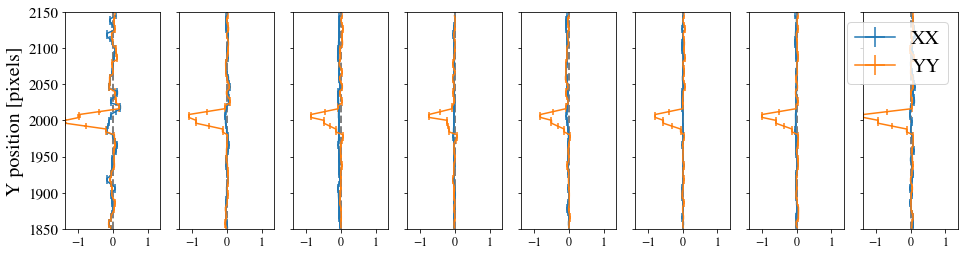

In [65]:
fig2, axes2 = plt.subplots(1, 8, figsize=(16,4))

#xbins = np.percentile(xmed[~np.isnan(ymean1)],np.linspace(0,100,9))
xbins = np.arange(420,4096,424)
dy    = 150

y,x   = np.mgrid[0:image1.shape[0] , 0:image1.shape[1]]
y_bins= np.arange(2000-dy,2000+dy,4)

for i in range(8):
    xmask = np.logical_not((x>xbins[i])&(x<=xbins[i+1]))
    #xmask = np.logical_not((x>lines[i])&(x<=lines[i+1]))
    ymed, ymean1, yerr1 = make_profile(100.*image1  , direction='y', mask=xmask, x0=xc,y0=yc, nbins=y_bins)
    ymed, ymean2, yerr2 = make_profile(100.*image2  , direction='y', mask=xmask, x0=xc,y0=yc, nbins=y_bins)
    
    axes2[i].axvline(0.,ls='--',color='grey',lw=2)
    axes2[i].errorbar(ymean1, ymed, yerr=np.diff(y_bins), xerr=yerr1, label='XX')
    axes2[i].errorbar(ymean2, ymed, yerr=np.diff(y_bins), xerr=yerr2, label='YY')
    
    axes2[i].set_ylim(2000-dy,2000+dy)
    
    w, = np.where(np.abs(ymed-2000.)<=dy)
    pi = np.nanmax(np.abs(ymean2[w]))
    print('peak: %.5f'%pi)
    if i == 0: li = pi
    axes2[i].set_xlim(-li,li)

    #axes2[i].set_xlim(50.*levels[0],50.*levels[1])
    axes2[i].tick_params(axis='y', labelleft=False)
    axes2[i].tick_params(axis='x', labelsize=12)
    
axes2[0].tick_params(axis='y', labelsize=15, labelleft=True)
axes2[0].set_ylabel('Y position [pixels]', fontsize=20)
# axes2[3].set_title(r'$\Delta$2nd moment vs. Y', fontsize=20)
#axes2[3].set_xlabel(r'$\Delta I_{ij} / I_{ij}$   [%]', fontsize=24)
axes2[7].legend(loc='upper right', fontsize=20)

#fig2.savefig('figures/fig_3a_secMoments_profile_across_x.pdf', dpi=240, format='pdf', bbox_inches='tight')

<ipython-input-211-ab28ec09c952>:24: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(sy2/n - mean*mean) / np.sqrt(n)


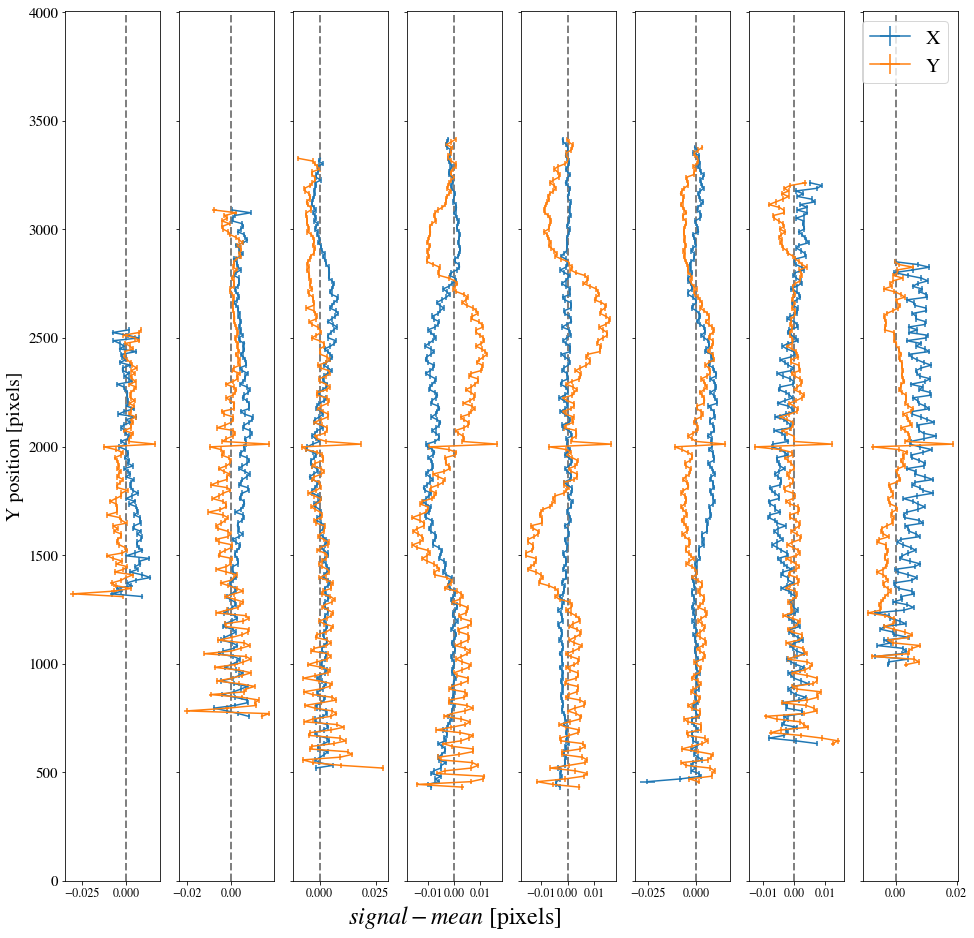

In [220]:
fig2, axes2 = plt.subplots(1, 8, figsize=(16,16))

#xbins = np.percentile(xmed[~np.isnan(ymean1)],np.linspace(0,100,9))
xbins = np.arange(420,4096,424)

for i in range(8):
    xmask = np.logical_not((x>xbins[i])&(x<=xbins[i+1]))
    ymed, ymean1, yerr1 = make_profile(dx_img, direction='y', mask=xmask, x0=xc,y0=yc, nbins=rad_bins)
    ymed, ymean2, yerr2 = make_profile(dy_img, direction='y', mask=xmask, x0=xc,y0=yc, nbins=rad_bins)
    
    axes2[i].axvline(0.,ls='--',color='grey',lw=2)
    axes2[i].errorbar(ymean1, ymed, yerr=np.diff(rad_bins), xerr=yerr1, label='X')
    axes2[i].errorbar(ymean2, ymed, yerr=np.diff(rad_bins), xerr=yerr2, label='Y')
    
    axes2[i].set_ylim((0, 4004))
    if i == 0: li = np.nanmax(np.abs(ymean1))
    axes2[i].set_xlim(-li,li)

    #axes2[i].set_xlim(9.*levels[0],9.*levels[1])
    axes2[i].tick_params(axis='y', labelleft=False)
    axes2[i].tick_params(axis='x', labelsize=12)
    
axes2[0].tick_params(axis='y', labelsize=15, labelleft=True)
axes2[0].set_ylabel('Y position [pixels]', fontsize=20)
# axes2[3].set_title(r'$\Delta$2nd moment vs. Y', fontsize=20)
axes2[3].set_xlabel(r'$signal-mean$ [pixels]', fontsize=24)
axes2[7].legend(loc='upper right', fontsize=20)
#fig2.savefig('figures/fig_3b_astroShift_profile_across_x.pdf', dpi=240, format='pdf', bbox_inches='tight')

<ipython-input-211-ab28ec09c952>:24: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(sy2/n - mean*mean) / np.sqrt(n)


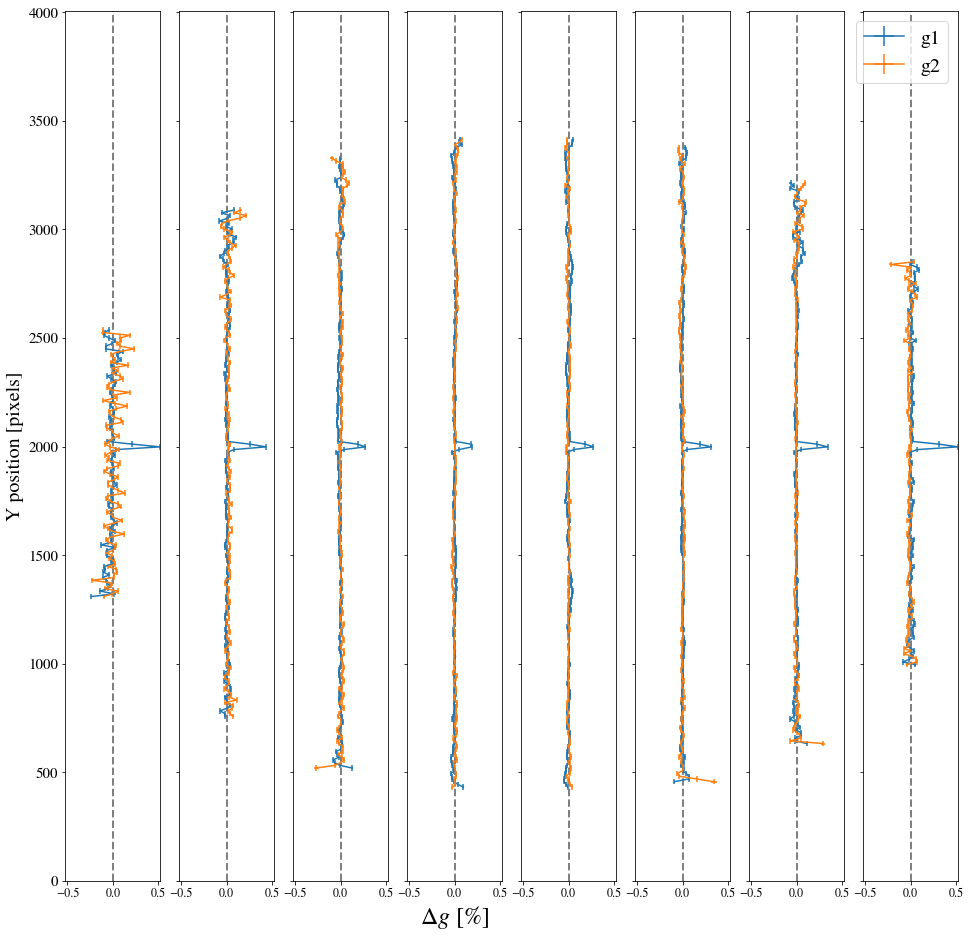

In [271]:
fig2, axes2 = plt.subplots(1, 8, figsize=(16,16))

#xbins = np.percentile(xmed[~np.isnan(ymean1)],np.linspace(0,100,9))
xbins = np.arange(420,4096,424)

for i in range(8):
    xmask = np.logical_not((x>xbins[i])&(x<=xbins[i+1]))
    ymed, ymean1, yerr1 = make_profile(100.*dg1_img  , direction='y', mask=xmask, x0=xc,y0=yc, nbins=rad_bins)
    ymed, ymean2, yerr2 = make_profile(100.*dg2_img  , direction='y', mask=xmask, x0=xc,y0=yc, nbins=rad_bins)
    
    axes2[i].axvline(0.,ls='--',color='grey',lw=2)
    axes2[i].errorbar(ymean1, ymed, yerr=np.diff(rad_bins), xerr=yerr1, label='g1')
    axes2[i].errorbar(ymean2, ymed, yerr=np.diff(rad_bins), xerr=yerr2, label='g2')
    
    axes2[i].set_ylim((0, 4004))
    
    if i == 0: li = np.nanmax(ymean1)
    axes2[i].set_xlim(-li,li)
    #axes2[i].set_xlim(50.*levels[0],50.*levels[1])
    axes2[i].tick_params(axis='y', labelleft=False)
    axes2[i].tick_params(axis='x', labelsize=12)
    
axes2[0].tick_params(axis='y', labelsize=15, labelleft=True)
axes2[0].set_ylabel('Y position [pixels]', fontsize=20)
# axes2[3].set_title(r'$\Delta$2nd moment vs. Y', fontsize=20)
axes2[3].set_xlabel(r'$\Delta g$ [%]', fontsize=24)
axes2[7].legend(loc='upper right', fontsize=20)
#fig2.savefig('figures/fig_3c_ellipticity_profile_across_x.pdf', dpi=240, format='pdf', bbox_inches='tight')

# Tree Ring Signal 

ompare the tree ring signals

In [5]:
cd notebooks/

/Users/jesteves/Documents/GitHub/lsst-treeRing/notebooks


In [6]:
from scipy.signal.signaltools import wiener
from scipy.signal import savgol_filter, general_gaussian
import scipy

def integrate_signal(r,signal,fs=1000,window=31,p=3):
    noisy     = np.zeros_like(r)
    noisy[1:] = np.array([scipy.integrate.simps(r[:i]*signal[:i],x=r[:i])/r[i] for i in range(1,len(r))])
    
    filtered = low_pass_filter(r,noisy,freq=1/fs)
    res  = savgol_filter(filtered, window, polyorder = p, deriv=0)
    return filtered

import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

def low_pass_filter(time,signal,freq=1/150):
    W = fftfreq(signal.size, d=time[1]-time[0])
    f_signal = rfft(signal)

    # If our original signal time was in seconds, this is now in Hz    
    cut_f_signal = f_signal.copy()
    cut_f_signal[(W<freq)] = 0

    cut_signal = irfft(cut_f_signal)
    return cut_signal

In [7]:
def plot_signal(out,ax=None,color=None,unit='%',label="",fill=False,factor=1.,
                percentage=False,alpha=0.8,ls='solid'):
    x,y,ym,yp = out[0], out[1], out[3], out[4]
    
    pr=1.
    if percentage: pr=100.
    ys = savgol_filter(y, window, polyorder = 3, deriv=0)    
    if ax is None: ax=plt.axes()
    p     = ax.plot(x, factor*ys*pr, lw=3, color=color,label=label,alpha=alpha,ls=ls)
    ax.plot(x,0.*x, 'k',ls=(0, (3, 10, 1, 10)),lw=2)
    color = p[0].get_color()
    if fill:    ax.fill_between(x,factor*pr*ym,factor*pr*yp,alpha=0.3, label=None, color=color)
        
    ax.set_xlabel('radius [pixels]',fontsize=24)
    ax.set_ylabel('dev. from mean [%s]'%(unit),fontsize=24)

In [23]:
def get_factor(list1,list2,is_range=True):
    x = list1[1]
    y = list2[1]
    
    if is_range: x = x[(list2[0]).astype(int)-(list1[0][0]).astype(int)]
        
    xstd = np.nanstd(x)
    ystd = np.nanstd(y)
    
    factor = ystd/xstd
    print('factor: %.2e'%factor)
    return factor

In [24]:
def load_profile(variable, sensor, sensorbay):
    pdir = '../profiles/'
    fname = f'{variable}_{sensor}_{sensorbay}.npy'
    print(f'fname: {fname}')
    return np.load(pdir+fname)

In [25]:
sensor = 'E2V'
sensorbay = 'R24_S11'

title = '%s: %s'%(sensor, sensorbay)

dr = load_profile('astrometric-shift', sensor, sensorbay)
dT = load_profile('psf-size', sensor, sensorbay)
dg = load_profile('ellipticity', sensor, sensorbay)
dF = load_profile('flatField', sensor, sensorbay)

fname: astrometric-shift_E2V_R24_S11.npy
fname: psf-size_E2V_R24_S11.npy
fname: ellipticity_E2V_R24_S11.npy
fname: flatField_E2V_R24_S11.npy


In [26]:
# sensor = 'e2v'
# dr = np.load('profiles/polar_{}_{}.npy'.format(sensor,'dr'))
# dT = np.load('profiles/polar_{}_{}.npy'.format(sensor,'dT'))
# dg = np.load('profiles/polar_{}_{}.npy'.format(sensor,'dgr'))
# dF = np.load('profiles/polar_{}_{}.npy'.format(sensor,'flat_norm'))

In [27]:
border = 50
rmin, rmax = dr[0][0]-border, dr[0][-1]+border
rmin = 2500
# rmin, rmax = 500, 5000

In [28]:
colors = ['#E74C3C','#8E44AD','#3498DB','#16A085','#16A085','#000080','k']

wlabel= r'$\frac{1}{r}\int_{0}^{r} r^\prime w(r^\prime) dr^\prime$'
dtlabel= r'$\frac{1}{r}\int_{0}^{r} r^\prime dT(r^\prime) dr^\prime$'
dglabel= r'$\frac{1}{r}\int_{0}^{r} r^\prime \gamma(r^\prime) dr^\prime$'

In [29]:
#fs     = 91
window = 71
p      = 3
dr2 = [dr[0]] 
dr2+= [100.*savgol_filter(signal, window, polyorder = p, deriv=1) for signal in dr[1:]]

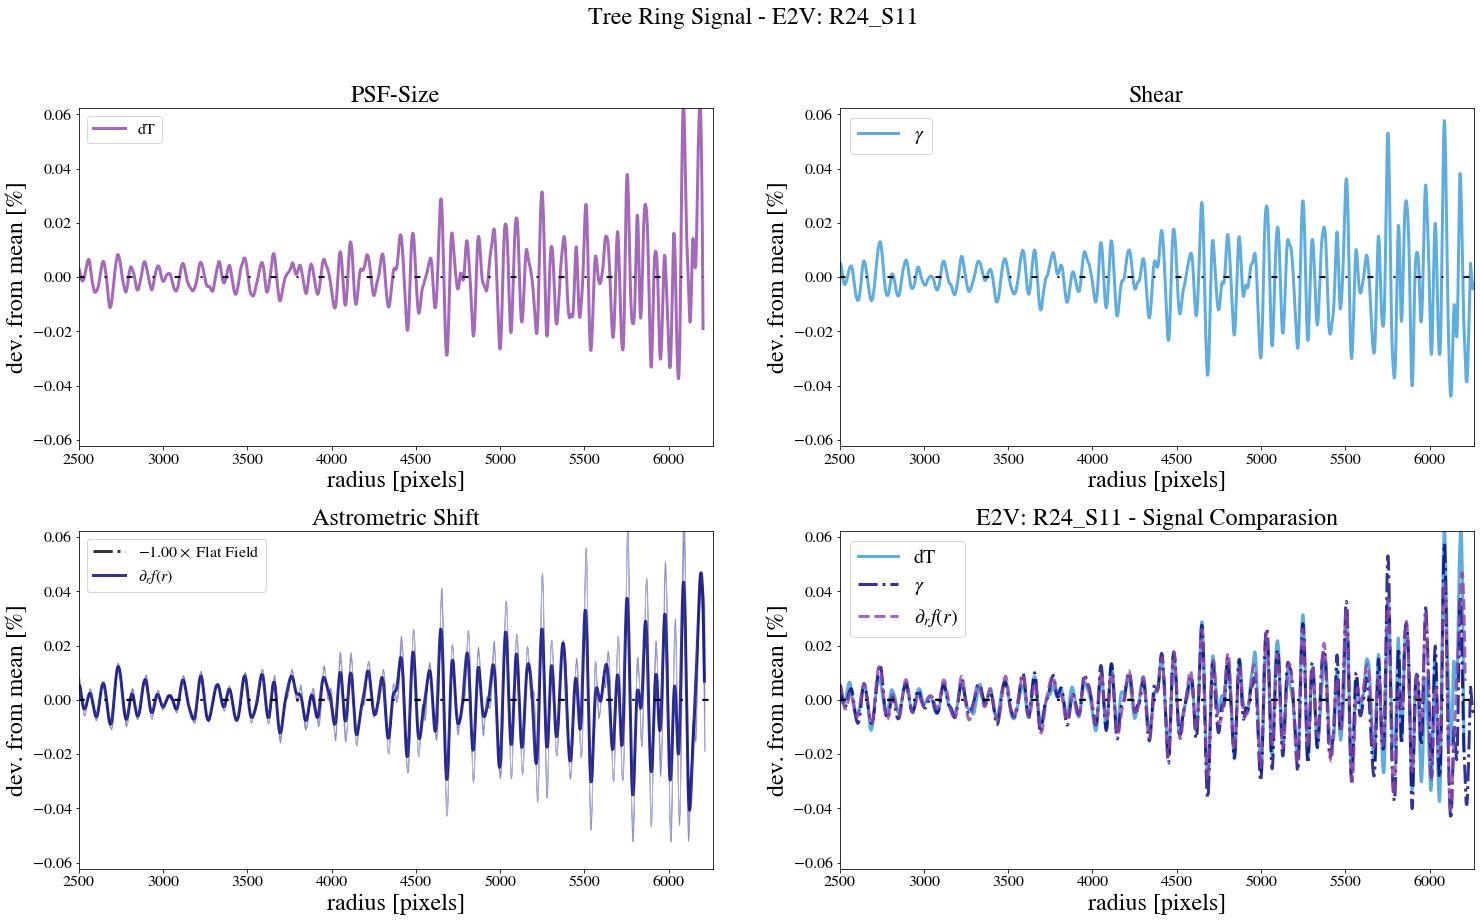

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(25, 2*6+2))
fig.subplots_adjust(hspace=0.25)
ymax = 3*np.std(dg[1])

ax = axs[0,0]
factor = 1.#get_factor(dF,dT)
# plot_signal(dF,label=r'$ %.2f \times $ Flat Field'%(-1*factor),
#              ax=ax,factor=-1*factor,unit='%',color=colors[-1],ls='-.')
plot_signal(dT,label='dT',ax=ax,fill=False,color=colors[1])
ax.legend(fontsize=16)
ax.legend(fontsize=16)
ax.set_xlim(rmin,rmax)
ax.set_ylim(-ymax,ymax)
ax.set_title('PSF-Size', fontsize=24)

ax = axs[0,1]
factor = 1.
# plot_signal(dF,label=r'$ %.2f \times $ Flat Field'%(-1*factor),
#              ax=ax,factor=-1*factor,unit='%',color=colors[-1],ls='-.')
plot_signal(dg,label=r'$\gamma$',ax=ax,fill=False,color=colors[2])
ax.legend(fontsize=20)
#ymax = 3*np.std(dg[1])
ax.legend(fontsize=20)
ax.set_xlim(rmin,rmax)
ax.set_ylim(-ymax,ymax)
ax.set_title('Shear', fontsize=24)

ax     = axs[1,0]
factor = 1.
plot_signal(dF,label=r'$%.2f \times$ %s'%(-1*factor,'Flat Field'),ax=ax,
            factor=-1*factor, fill=False,unit='%',color=colors[-1],ls='-.')
plot_signal(dr2,label='$\partial_r f(r)$',ax=ax,fill=True,color=colors[5])
#ymax = 3*np.std(dr2[1])
ax.legend(fontsize=16)
ax.set_xlim(rmin,rmax)
ax.set_ylim(-ymax,ymax)
ax.set_title('Astrometric Shift', fontsize=24)

ax = axs[1,1]
factor = 1.#get_factor(dT,dr2,is_range=False)
plot_signal(dT,label=r'%s'%('dT'),ax=ax,factor=+1.,fill=False,unit='%',color=colors[2])
plot_signal(dg,label=r'%s'%('$\gamma$') ,ax=ax,factor=+1.,fill=False,unit='%',color=colors[5],ls='-.')
plot_signal(dr2,label=r'$\partial_r f(r)$',ax=ax,fill=False,color=colors[1],ls='--')
ax.legend(fontsize=20)

#ymax = 3*np.std(dr2[1])
ax.legend(fontsize=20)
ax.set_xlim(rmin,rmax)
ax.set_ylim(-ymax,ymax)
ax.set_title(title+' - Signal Comparasion', fontsize=24)
fig.suptitle('Tree Ring Signal - '+title, fontsize=24)
fig.savefig('../figures/fig_treeRing_Signal_%s.pdf'%sensorbay, dpi=100, format='pdf', bbox_inches='tight')

In [44]:
def plot_figure_4(sensor, sensorbay, border = 50, window = 71, save=False):
    title = '%s: %s'%(sensor, sensorbay)
    
    # load profiles
    dr = load_profile('astrometric-shift', sensor, sensorbay)
    dT = load_profile('psf-size', sensor, sensorbay)
    dg = load_profile('ellipticity', sensor, sensorbay)
    dF = load_profile('flatField', sensor, sensorbay)
    
    # set xlims 
    rmin, rmax = dr[0][0]-border, dr[0][-1]+border
    rmin = 2500
    
    # taking derivative
    dr2 = [dr[0]] 
    dr2+= [100.*savgol_filter(signal, window, polyorder = 3, deriv=1) for signal in dr[1:]]
    
    # make the plot
    fig, axs = plt.subplots(2, 2, figsize=(25, 2*6+2))
    fig.subplots_adjust(hspace=0.25)
    ymax = 3*np.std(dg[1])

    ax = axs[0,0]
    factor = 1.#get_factor(dF,dT)
    plot_signal(dF,label=r'$ %.2f \times $ Flat Field'%(-1*factor),
                 ax=ax,factor=-1*factor,unit='%',color=colors[-1],ls='-.')
    plot_signal(dT,label='dT',ax=ax,fill=False,color=colors[1])
    ax.legend(fontsize=16)
    ax.legend(fontsize=16)
    ax.set_xlim(rmin,rmax)
    ax.set_ylim(-ymax,ymax)
    ax.set_title('PSF-Size', fontsize=24)

    ax = axs[0,1]
    factor = 1.
    plot_signal(dF,label=r'$ %.2f \times $ Flat Field'%(-1*factor),
                 ax=ax,factor=-1*factor,unit='%',color=colors[-1],ls='-.')
    plot_signal(dg,label=r'$\gamma$',ax=ax,fill=False,color=colors[2])
    ax.legend(fontsize=20)
    #ymax = 3*np.std(dg[1])
    ax.legend(fontsize=20)
    ax.set_xlim(rmin,rmax)
    ax.set_ylim(-ymax,ymax)
    ax.set_title('Shear', fontsize=24)

    ax     = axs[1,0]
    factor = 1.
    plot_signal(dF,label=r'$%.2f \times$ %s'%(-1*factor,'Flat Field'),ax=ax,
                factor=-1*factor, fill=False,unit='%',color=colors[-1],ls='-.')
    plot_signal(dr2,label='$\partial_r f(r)$',ax=ax,fill=True,color=colors[5])
    #ymax = 3*np.std(dr2[1])
    ax.legend(fontsize=16)
    ax.set_xlim(rmin,rmax)
    ax.set_ylim(-ymax,ymax)
    ax.set_title('Astrometric Shift', fontsize=24)

    ax = axs[1,1]
    factor = 1.#get_factor(dT,dr2,is_range=False)
    plot_signal(dT,label=r'%s'%('dT'),ax=ax,factor=+1.,fill=False,unit='%',color=colors[2])
    plot_signal(dg,label=r'%s'%('$\gamma$') ,ax=ax,factor=+1.,fill=False,unit='%',color=colors[5],ls='-.')
    plot_signal(dr2,label=r'$\partial_r f(r)$',ax=ax,fill=False,color=colors[1],ls='--')
    ax.legend(fontsize=20)

    #ymax = 3*np.std(dr2[1])
    ax.legend(fontsize=20)
    ax.set_xlim(rmin,rmax)
    ax.set_ylim(-ymax,ymax)
    ax.set_title(title+' - Signal Comparasion', fontsize=24)
    fig.suptitle('Tree Ring Signal - '+title, fontsize=24)
    if save:
        fig.savefig('../figures/fig_treeRing_Signal_%s.pdf'%sensorbay, dpi=100, format='pdf', bbox_inches='tight')


In [45]:
keys_dict = {'u/snyder18/spot_13242/gridfit_run1': ['R03_S12','ITL'],
             'u/snyder18/spot_13243/gridfit_run1': ['R10_S11','ITL'],
             'u/snyder18/spot_13237/gridfit_run1': ['R24_S11','e2v'],
             'u/snyder18/spot_13246/gridfit_run1': ['R32_S01','e2v'],
             'u/asnyder/spot/e2v_analysis': ['R22_S11','e2v'],
             'u/asnyder/spot/itl_analysis': ['R02_S02','ITL'],
            }

Plot ITL
fname: astrometric-shift_ITL_R03_S12.npy
fname: psf-size_ITL_R03_S12.npy
fname: ellipticity_ITL_R03_S12.npy
fname: flatField_ITL_R03_S12.npy


ValueError: Axis limits cannot be NaN or Inf

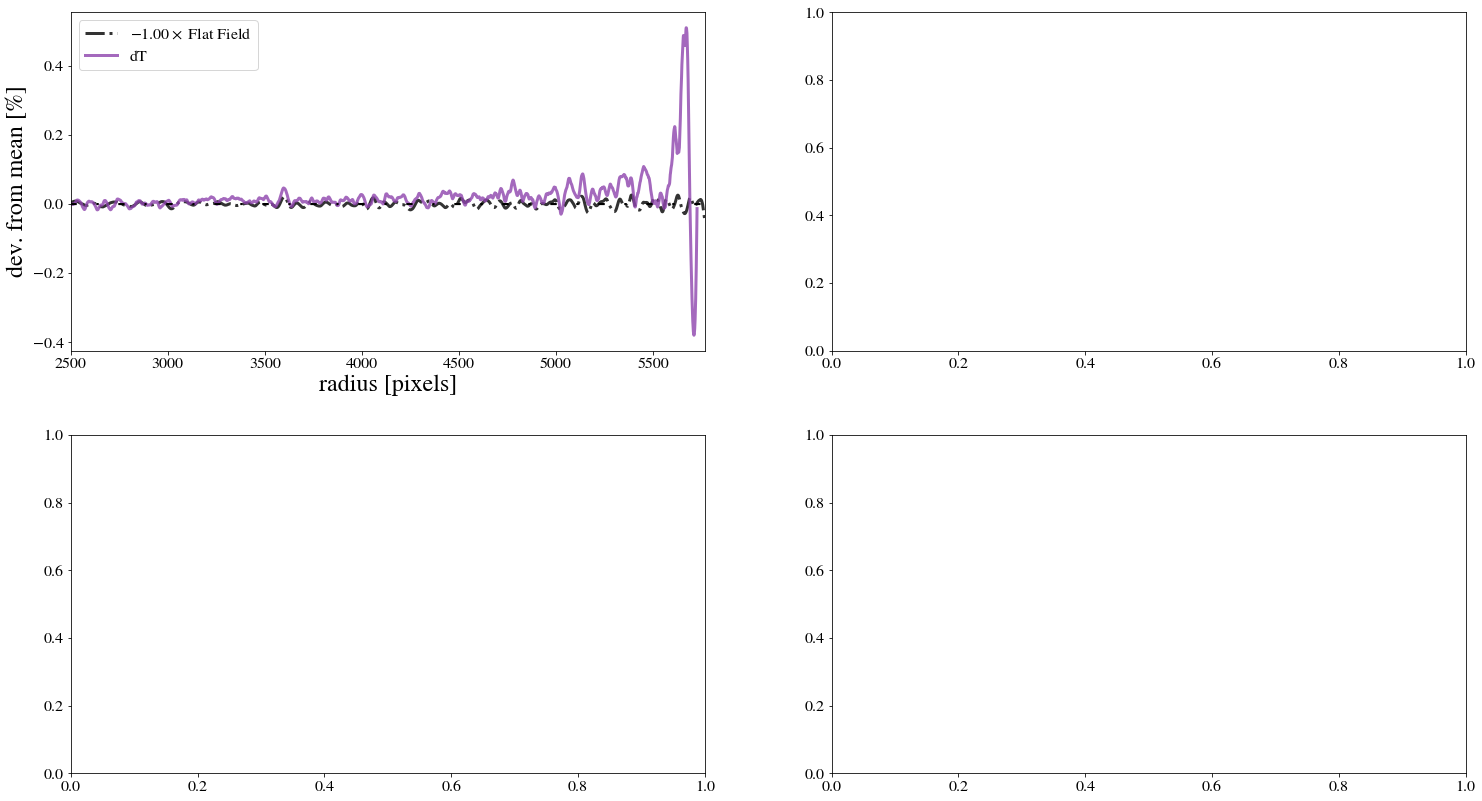

In [46]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('../figures/fig_treeRing_Signal_collection.pdf') as pdf:
    for sensor, sensorbay in keys_dict.values():
        print('Plot %s'%sensorbay)
        plot_figure_4(sensorbay, sensor)
        pdf.savefig()
        print('')

In [ ]:
# Plot 